# **CA05 - Logistic Regression**
## **Megan Rice**

# **Data Source, Contents, and Import**

Cardiovascular Disease (CVD) kills more people than cancer globally. A dataset of real heart patients collected from a 15 year heart study cohort is made available for this assignment. The dataset has 16 patient features. Note that none of the features include any Blood Test information.


Data Column (Feature Name) Descriptions:

cvd_4types: Label Column. 0 indicates “No Risk”, 1 indicates “Risk Present” age_s1: Age in Years
race: 1 - White, 2 - Black, 3 – Other
....


Get the definition of rest of the 16 features by searching on the feature name at the following web page:
https://sleepdata.org/datasets/shhs/variables

In [427]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score

In [428]:
#uploading the data
df_cvd = pd.read_csv('https://raw.githubusercontent.com/ArinB/CA05-B-Logistic-Regression/master/cvd_data.csv')

#**Data Quality Analysis**

In [429]:
#rename columns for a better clarification
df_cvd.rename(columns= {'age_s1':'age',
                    'educat':'education_level', 
                    'mstat':'marital_status',
                    'neck20': 'neck',
                    'cgpkyr':'cigarette_consumption',
                    'tea15':'caffeine_consumption',
                    'srhype':'hypertension',
                    'bend25':'bending',
                    'happy25':'happiness',
                    'tired25':'fatigue',
                    'hlthlm25': 'activity',
                    'parrptdiab':'diabetes',
                    'cvd_4types':'cvd_risk'}, inplace= True)

In [430]:
#number of null values in each column
df_cvd.isnull().sum()

cvd_risk                 0
age                      0
race                     0
education_level          0
marital_status           0
hip                      0
neck                     0
waist                    0
av_weight_kg             0
cigarette_consumption    0
caffeine_consumption     0
hypertension             0
diabetes                 0
bending                  0
happiness                0
fatigue                  0
activity                 0
dtype: int64

In [431]:
#number of non-null values for each column
df_cvd.count()

cvd_risk                 3242
age                      3242
race                     3242
education_level          3242
marital_status           3242
hip                      3242
neck                     3242
waist                    3242
av_weight_kg             3242
cigarette_consumption    3242
caffeine_consumption     3242
hypertension             3242
diabetes                 3242
bending                  3242
happiness                3242
fatigue                  3242
activity                 3242
dtype: int64

In [432]:
#statistical description of data
df_cvd.describe()

,cvd_risk,age,race,education_level,marital_status,hip,neck,waist,av_weight_kg,cigarette_consumption,caffeine_consumption,hypertension,diabetes,bending,happiness,fatigue,activity
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [433]:
#displaying range, column, number of non-null objects of each column, datatype, and memory usage
df_cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cvd_risk               3242 non-null   int64  
 1   age                    3242 non-null   int64  
 2   race                   3242 non-null   int64  
 3   education_level        3242 non-null   int64  
 4   marital_status         3242 non-null   int64  
 5   hip                    3242 non-null   float64
 6   neck                   3242 non-null   float64
 7   waist                  3242 non-null   float64
 8   av_weight_kg           3242 non-null   float64
 9   cigarette_consumption  3242 non-null   float64
 10  caffeine_consumption   3242 non-null   int64  
 11  hypertension           3242 non-null   int64  
 12  diabetes               3242 non-null   int64  
 13  bending                3242 non-null   int64  
 14  happiness              3242 non-null   int64  
 15  fati

In [434]:
#displaying top 5 and bottom 5 records
df_cvd.head()
df_cvd.tail()

,cvd_risk,age,race,education_level,marital_status,hip,neck,waist,av_weight_kg,cigarette_consumption,caffeine_consumption,hypertension,diabetes,bending,happiness,fatigue,activity
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


#**Exploratory Data Analysis**

Text(0.5, 1.0, 'Cardiovascular Disease Risk')

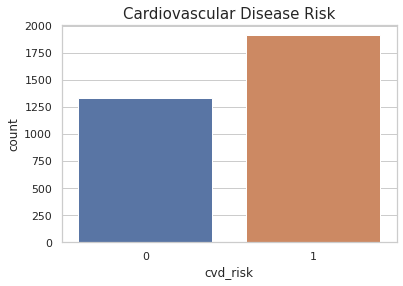

In [435]:
#comparing cardiovascular disease risk variable
#0 = No Risk, 1 = Risk Present
sn.countplot(x='cvd_risk', data=df_cvd)
plt.title('Cardiovascular Disease Risk', fontsize = 15)

In [436]:
#checking correlation coefficient for each variable
df_cvd.corr()

,cvd_risk,age,race,education_level,marital_status,hip,neck,waist,av_weight_kg,cigarette_consumption,caffeine_consumption,hypertension,diabetes,bending,happiness,fatigue,activity
cvd_risk,1.000000,0.089168,-0.143843,0.053662,-0.076659,0.018482,0.101653,0.203104,0.058616,0.037151,-0.028436,0.071819,0.074406,-0.009653,-0.033048,0.022130,-0.126168
age,0.089168,1.000000,0.000626,-0.207595,0.013170,-0.121743,-0.001135,0.086363,0.073152,0.072336,-0.007279,0.268032,0.140819,-0.224303,-0.044323,0.012448,-0.164790
race,-0.143843,0.000626,1.000000,-0.061934,0.058878,0.030535,-0.010810,0.012960,0.045118,-0.040240,-0.005746,0.053822,0.079818,-0.064647,0.005103,-0.014226,-0.117117
education_level,0.053662,-0.207595,-0.061934,1.000000,0.026047,-0.008162,0.000856,-0.057212,-0.052692,-0.047632,0.022097,-0.110072,-0.117066,0.166887,-0.093659,0.079794,0.096398
marital_status,-0.076659,0.013170,0.058878,0.026047,1.000000,0.012425,-0.078962,-0.044175,-0.046429,-0.006983,0.012250,-0.002689,0.012210,-0.016304,0.033619,-0.031645,-0.055162
hip,0.018482,-0.121743,0.030535,-0.008162,0.012425,1.000000,0.321828,0.710743,0.428565,-0.006662,0.003894,0.121578,0.085835,-0.229975,0.029561,-0.131190,-0.096214
neck,0.101653,-0.001135,-0.010810,0.000856,-0.078962,0.321828,1.000000,0.617500,0.525890,0.190235,0.022729,0.105139,0.118303,-0.091327,0.008170,0.002945,-0.010144
waist,0.203104,0.086363,0.012960,-0.057212,-0.044175,0.710743,0.617500,1.000000,0.641330,0.112615,0.014916,0.201122,0.134582,-0.246275,0.020475,-0.091524,-0.111527
av_weight_kg,0.058616,0.073152,0.045118,-0.052692,-0.046429,0.428565,0.525890,0.641330,1.000000,0.111671,0.013763,0.196695,0.094746,-0.155036,0.028020,-0.054466,-0.015056
cigarette_consumption,0.037151,0.072336,-0.040240,-0.047632,-0.006983,-0.006662,0.190235,0.112615,0.111671,1.000000,0.000500,0.013163,0.044049,-0.056544,0.026469,-0.051990,-0.030523


Text(0.5, 1.0, 'Correlation Heatmap')

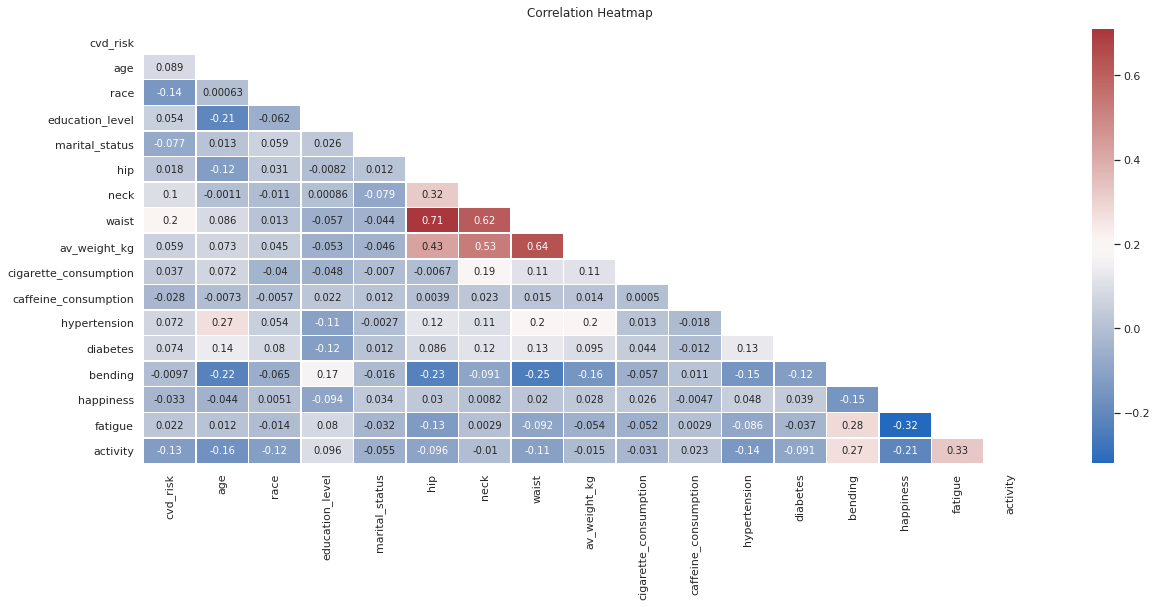

In [437]:
#checking for multi-collinearity
plt.figure(figsize=(20,8))

mask = np.triu(np.ones_like(df_cvd.corr(), dtype=np.bool))

heatmap = sn.heatmap(df_cvd.corr(), mask=mask, annot=True, cmap="vlag", linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [438]:
#dropping waist as it has a multi-collinearity problem with hip
df_cvd = df_cvd.drop('waist', axis = 'columns')

#**Splitting The Data**

In [439]:
#defining x and y
x = df_cvd[['age', 'race', 'education_level', 'marital_status', 'hip',
       'neck', 'av_weight_kg', 'cigarette_consumption',
       'caffeine_consumption', 'hypertension', 'diabetes', 'bending',
       'happiness', 'fatigue', 'activity']]
y = df_cvd['cvd_risk']

#splitting data into 70% training and 30% testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

#**Part 1** 

##**build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible**

In [440]:
#creating the logistic regression model
logreg = LogisticRegression(C=1e40, solver='newton-cg', random_state=101, penalty= 'l2')
logreg.fit(x_train, y_train)

LogisticRegression(C=1e+40, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

#**Part 2** 
##**Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk**

In [408]:
#coefficients
#a higher value (sign considered) of the coefficients will imply larger influence
logreg.fit(x_train / np.std(x_train, 0), y_train)
coeff= logreg.coef_
print(logreg.coef_)

[[ 0.11067121 -0.34371312  0.18393119 -0.13408555 -0.02134661  0.13674643
   0.08923596  0.02857231 -0.03990844  0.0810493   0.15140612  0.00321182
  -0.0841356   0.1151847  -0.39551831]]


In [409]:
#coefficients sorted in ascending order
coeff_df = pd.DataFrame(logreg.coef_, columns=[x_train], index=['Coefficients'])
coeff_df = coeff_df.transpose()
coeff_df.sort_values('Coefficients', ascending=False)

,Coefficients
education_level,0.183931
diabetes,0.151406
neck,0.136746
fatigue,0.115185
age,0.110671
av_weight_kg,0.089236
hypertension,0.081049
cigarette_consumption,0.028572
bending,0.003212
hip,-0.021347


In [410]:
#coefficients sorted in ascending order by absolute values AKA sign considered
coeff_df.abs().sort_values('Coefficients', ascending=False)

,Coefficients
activity,0.395518
race,0.343713
education_level,0.183931
diabetes,0.151406
neck,0.136746
marital_status,0.134086
fatigue,0.115185
age,0.110671
av_weight_kg,0.089236
happiness,0.084136


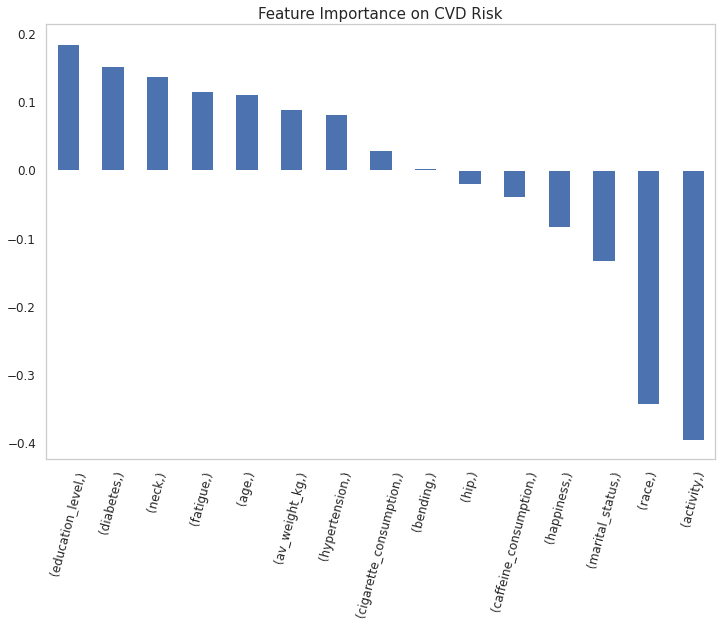

In [411]:
#displaying coefficient values
coeff_df.sort_values('Coefficients', ascending=False).plot(kind = 'bar',  figsize = (12,8), legend = None)
plt.title('Feature Importance on CVD Risk', fontsize = 15)
plt.xticks(rotation = 75, fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

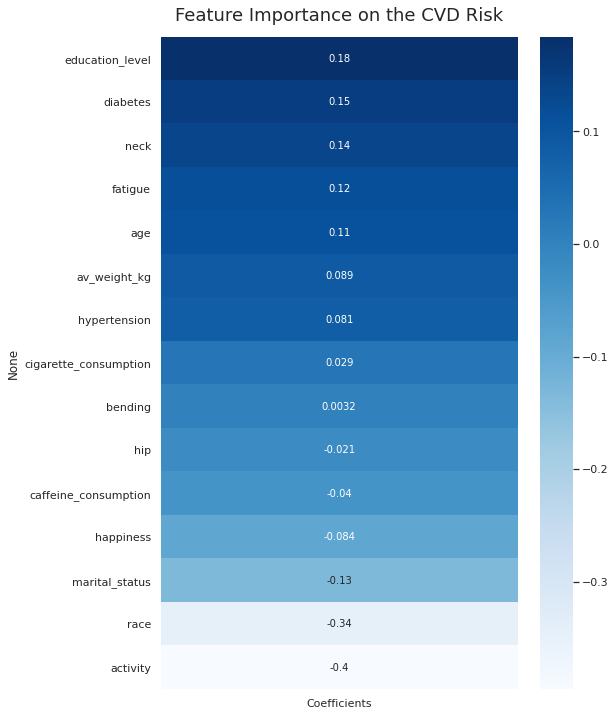

In [412]:
#displaying coefficient values
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(coeff_df.sort_values('Coefficients', ascending=False), annot=True, cmap='Blues')
heatmap.set_title('Feature Importance on the CVD Risk', fontdict={'fontsize':18}, pad=16);

These coefficients can provide the basis for a feature importance score. The positive scores indicate a feature that predicts class 1 (Risk Present), whereas the negative scores indicate a feature that predicts class 0 (No Risk).

#**Part 3**

##**Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion.**

In [441]:
#predicting the test set results and calculating the accuracy
y_pred = logreg.predict(x_test)
print('Accuracy: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy: 0.66


In [442]:
#compute precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.36      0.48       415
           1       0.65      0.89      0.75       558

    accuracy                           0.66       973
   macro avg       0.68      0.63      0.62       973
weighted avg       0.68      0.66      0.64       973



[[151 264]
 [ 62 496]]


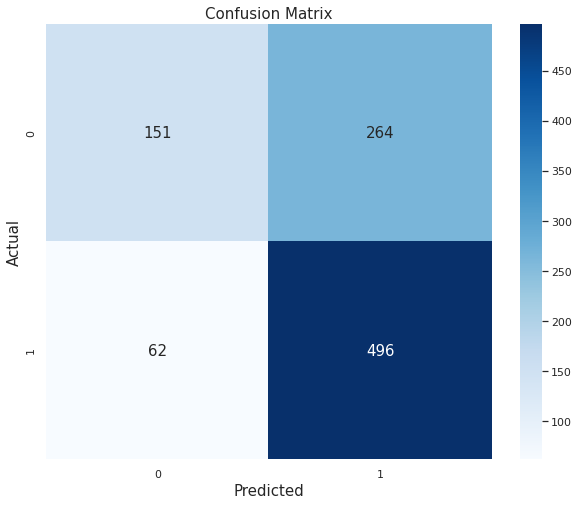

In [443]:
#confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.figure(figsize=(10,8))
sn.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt= "d", annot_kws={"size": 15})
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [447]:
#AUC Score
roc_auc_score(y_test,y_pred)
print('AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)))

AUC: 0.63


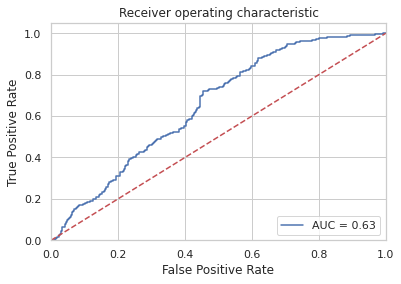

In [445]:
#ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#**Conclusion**

In general, this is a good model. It has a decent AUC score at 63%. The ROC Curve also shows that the true positive rate is significantly higher than the false positive rate. This is also reflected in the recall score, which shows that the model is very good at making an accurate prediction out of the overall positive cases. Given that the context of this model is to identify cardiovascular disease risk, it is a good thing that the recall is so high as for disease diagnosis you want to capture all positive cases.